#**Introduction**



---






In today's digital world, credit card approval holds immense importance for responsible financial decisions. It helps banks assess creditworthiness, minimize risks, and prevent fraud. Identifying creditworthy clients is invaluable, reducing defaults and maximizing profitability.

Predicting credit card approvals revolutionizes banking, reducing risks, enhancing customer satisfaction, and enabling data-driven decisions. Machine learning in banking, particularly in India, streamlines processes, improves accuracy, and elevates customer experience.

This project aims to analyze data extensively and employ Python-based machine learning techniques. The goal is to create a top-tier model emphasizing crucial features for both business value and practical use.

#**Objective:**

---



---



The primary aim of this project is to predict whether a prospective applicant will likely use a credit card. The tool aims to provide an estimate of approval chances without affecting the applicant's credit score. It's designed for individuals seeking a credit score-neutral assessment before applying for a credit card.

##**Features name: (Credit_Card.csv)**

---



**Ind_ID**: Client ID

**Gender**: Gender information

**Car_owner:** Having car or not

**Propert_owner:** Having property or not

**Children:** Count of children

**Annual_income:** Annual income

**Type_Income:** Income type

**Education**: Education level

**Marital_status**: Marital_status

**Housing_type:** Living style

**Birthday_count:** Use backward count from current day (0), -1 means yesterday.

**Employed_days:** Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

**Mobile_phone:** Any mobile phone

**Work_phone:** Any work phone

**Phone:**Any phone number

**EMAIL_ID:** Any email ID

**Type_Occupation:** Occupation

**Family_Members:** Family size


##**Another data set (Credit_card_label.csv) contains two key pieces of information**

---



---



**ID:** The joining key between application data and credit status data, same is Ind_ID

**Label:** 0 is application approved and 1 is application rejected.

##**Importing Required Libraries:**

---



---



In [172]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Mathematical operations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Enhanced data visualization
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output




**Loading and Exploring the Dataset:**

In [173]:
# Importing necessary files
Credit_card = pd.read_csv('Credit_card.csv')
Credit_label = pd.read_csv('Credit_card_label.csv')


In [174]:
# Merging tables into one DataFrame
cc = pd.merge(Credit_card, Credit_label, how='left', on='Ind_ID')

In [175]:
new_cc = cc.copy()  # Creating a new copy
new_cc.shape  # Checking the shape of the DataFrame

(1548, 19)

In [176]:
new_cc.head()      # exploring first five variables to check the data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [177]:
# Renaming columns in the new_cc DataFrame for improved readability
new_cc = new_cc.rename(columns={
    'Ind_ID': 'ID',
    'GENDER': 'Gender',
    'Propert_Owner': 'Property_Owner',
    'CHILDREN': 'Children_count',
    'EDUCATION': 'Education_level',
    'EMAIL_ID': 'Email_id',
    'Birthday_count': 'Age'
})

In [178]:
# Displaying the first five rows of the CC DataFrame to check the renamed features
new_cc.head(2)


,ID,Gender,Car_Owner,Property_Owner,Children_count,Annual_income,Type_Income,Education_level,Marital_status,Housing_type,Age,Employed_days,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [179]:
new_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Property_Owner   1548 non-null   object 
 4   Children_count   1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education_level  1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Age              1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_id         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [180]:
# Describing all features in the new_cc DataFrame, including statistical information
new_cc.describe(include='all')


,ID,Gender,Car_Owner,Property_Owner,Children_count,Annual_income,Type_Income,Education_level,Marital_status,Housing_type,Age,Employed_days,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
count,1.548000e+03,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060,1548.000000,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499,0.113049
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772,0.316755
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,0.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,0.000000


In [181]:
# Counting total missing values in each feature and arranging in descending order
new_cc.isnull().sum().sort_values(ascending=False)


Type_Occupation    488
Annual_income       23
Age                 22
Gender               7
ID                   0
Employed_days        0
Family_Members       0
Email_id             0
Phone                0
Work_Phone           0
Mobile_phone         0
Housing_type         0
Marital_status       0
Education_level      0
Type_Income          0
Children_count       0
Property_Owner       0
Car_Owner            0
label                0
dtype: int64

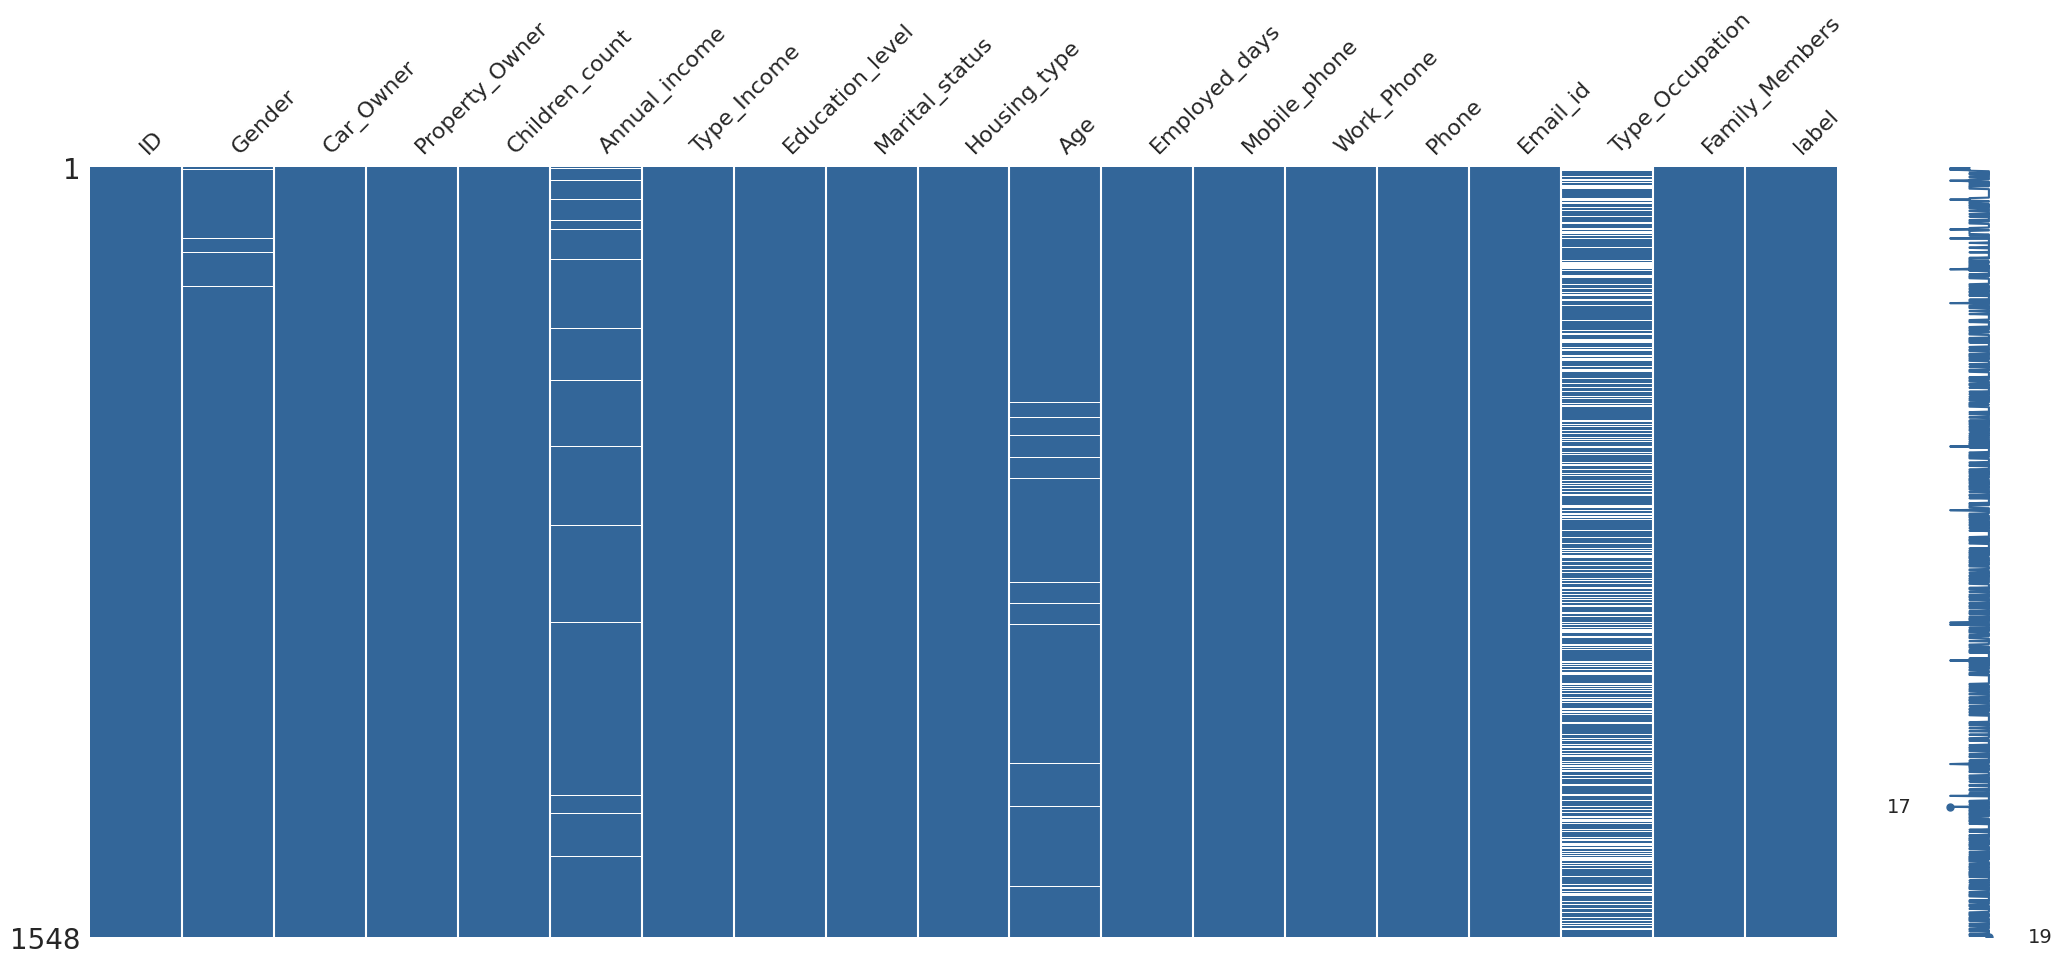

In [182]:
import missingno as msno
import matplotlib.pyplot as plt

# Creating a matrix visualization of missing values for the new_cc DataFrame
msno.matrix(new_cc,color=(0.2, 0.4, 0.6))
plt.show()


The **Type_Occupation** column contains a higher number of missing values compared to Gender, Annual_income, and Age, which exhibit relatively fewer missing values.

In [183]:
# Finding the mode (most frequent value) in the Gender column of the new_cc DataFrame
new_cc['Gender'].mode()


0    F
Name: Gender, dtype: object

In [184]:
# Replacing missing categorical data in the Gender and Type_Occupation columns
new_cc['Gender'].fillna('F', inplace=True)
new_cc['Type_Occupation'].fillna('Missing', inplace=True)


In [185]:
new_cc.head() #To check the changes

,ID,Gender,Car_Owner,Property_Owner,Children_count,Annual_income,Type_Income,Education_level,Marital_status,Housing_type,Age,Employed_days,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,Missing,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Missing,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,Missing,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Missing,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Missing,2,1


**Exploratory Data Analysis**

---



---



In [186]:
# Counting the occurrences of each category in the 'Gender' column
new_cc['Gender'].value_counts()


F    980
M    568
Name: Gender, dtype: int64

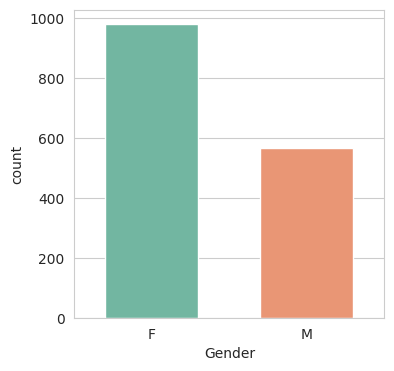

In [187]:
plt.figure(figsize=(4,4))
sns.set_style('whitegrid')
sns.countplot(data=new_cc, x='Gender', width=0.6, order=new_cc['Gender'].value_counts(ascending=False).index, palette='Set2')
plt.show()

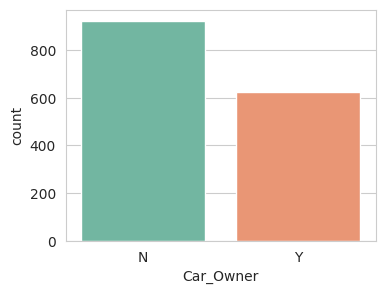

In [188]:

plt.figure(figsize=(4,3))  # Adjusting the figure size
sns.set_style('whitegrid')
sns.countplot(data=new_cc, x='Car_Owner', width=0.8, order=new_cc['Car_Owner'].value_counts(ascending=False).index, palette='Set2')
plt.show()


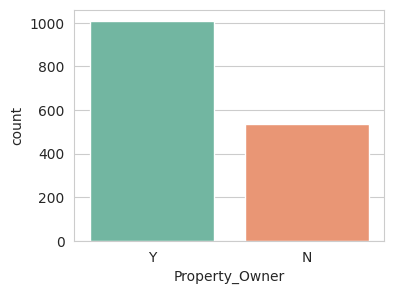

In [189]:
plt.figure(figsize=(4,3))
sns.set_style('whitegrid')
sns.countplot(data = new_cc, x= 'Property_Owner',palette='Set2')
plt.show()

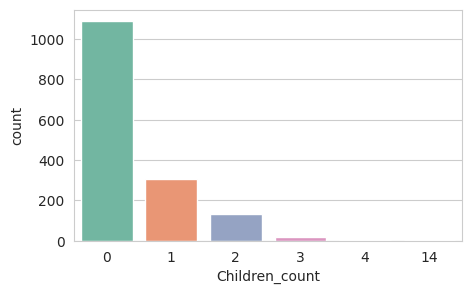

In [190]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(new_cc, x='Children_count',palette="Set2")
plt.show()

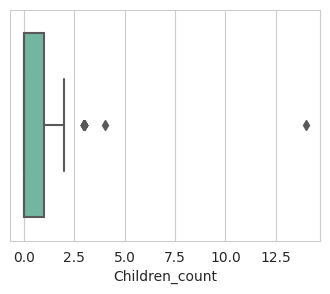

In [191]:
plt.figure(figsize=(4,3))
sns.set_style('whitegrid')
sns.boxplot(new_cc, x= 'Children_count',palette='Set2')
plt.show()

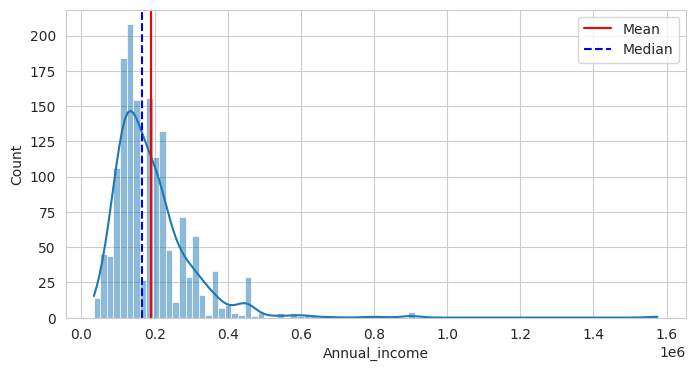

In [192]:
plt.figure(figsize=(8, 4))
sns.histplot(new_cc['Annual_income'], palette='Set2', kde=True)
plt.axvline(new_cc['Annual_income'].mean(), color='red', label='Mean')
plt.axvline(new_cc['Annual_income'].median(), color='blue', linestyle='--', label='Median')
plt.legend()
plt.show()

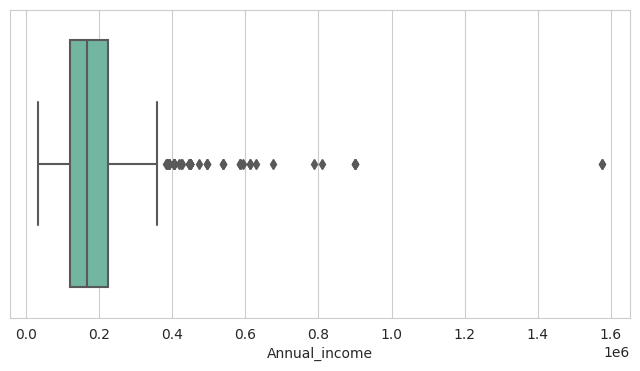

In [193]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=new_cc, x='Annual_income', palette='Set2')
plt.show()

In [194]:
new_cc['Annual_income'].skew()

3.9245642452364167

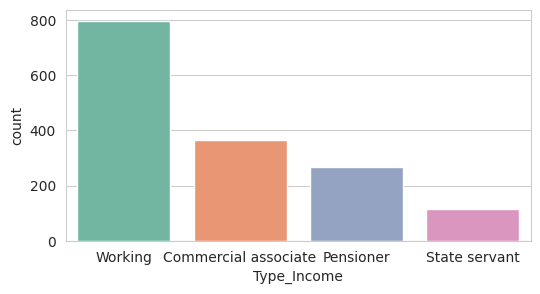

In [195]:
plt.figure(figsize=(6,3))
sns.set_style('whitegrid')
sns.countplot(data = new_cc, x= 'Type_Income',order = new_cc['Type_Income'].value_counts(ascending=False).index,palette='Set2')
plt.show()

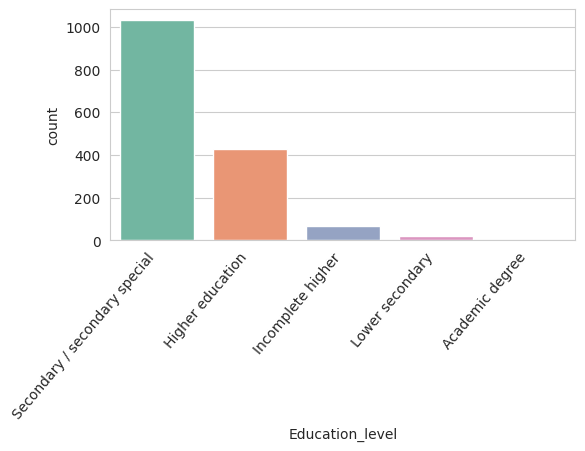

In [196]:
plt.figure(figsize=(6,3))
sns.set_style('whitegrid')
ax = sns.countplot(data = new_cc, x= 'Education_level',order = new_cc['Education_level'].value_counts(ascending=False).index,palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

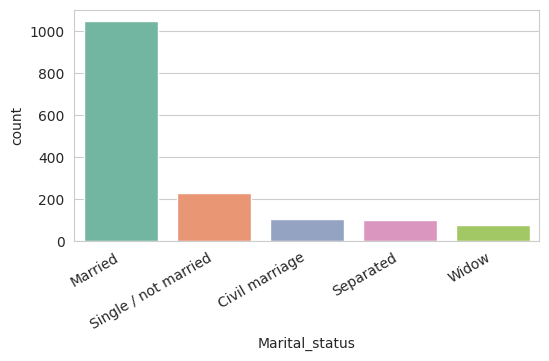

In [197]:
plt.figure(figsize=(6,3))
ax = sns.countplot(new_cc, x='Marital_status',palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.show()

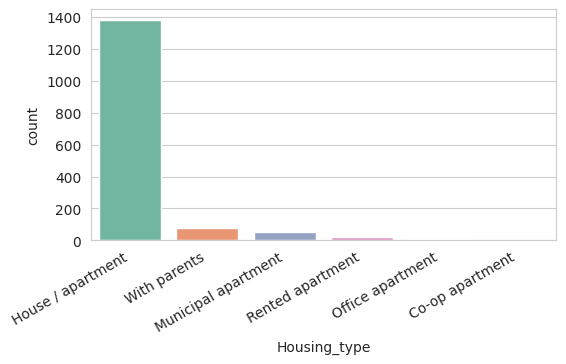

In [198]:
plt.figure(figsize=(6,3))
sns.set_style('whitegrid')
ax = sns.countplot(new_cc, x='Housing_type', order = new_cc['Housing_type'].value_counts(ascending=False).index,palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.show()

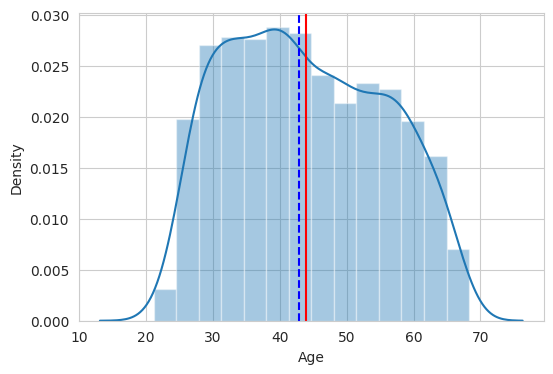

In [199]:
plt.figure(figsize=(6,4))
Age = new_cc['Age']/-365.25
sns.distplot(Age)
plt.axvline(Age.mean(), color = 'red', label = 'Mean')
plt.axvline(Age.median(), color = 'blue', ls = '--', label = 'Median')
plt.show()

In [200]:
print(round(Age.min(), 2))
print(round(Age.max(), 2))
print(round(Age.mean(), 2))
print(round(Age.median(), 2))  # Correcting mean to median
print(round(Age.skew(), 2))


21.1
68.3
43.92
42.88
0.17


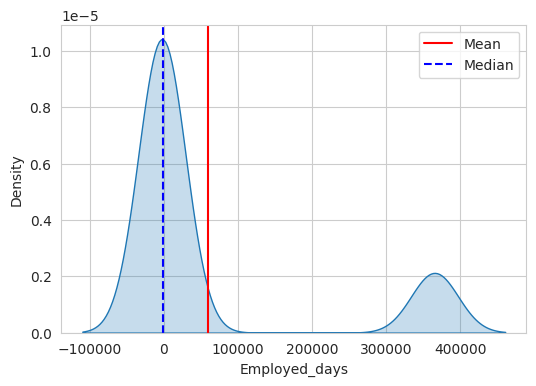

In [201]:
plt.figure(figsize=(6, 4))
sns.kdeplot(new_cc['Employed_days'], fill=True)
plt.axvline(new_cc['Employed_days'].mean(), color='red', label='Mean')
plt.axvline(new_cc['Employed_days'].median(), color='blue', linestyle='--', label='Median')
plt.legend()
plt.show()

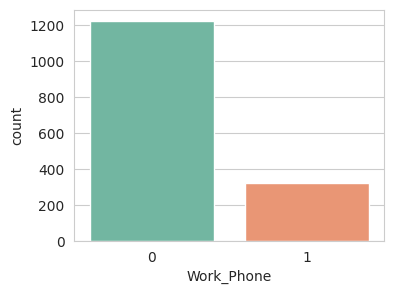

In [202]:
plt.figure(figsize=(4,3))
sns.set_style('whitegrid')
sns.countplot(new_cc, x='Work_Phone',palette='Set2')
plt.show()

In [203]:
new_cc['Mobile_phone'].value_counts()

1    1548
Name: Mobile_phone, dtype: int64

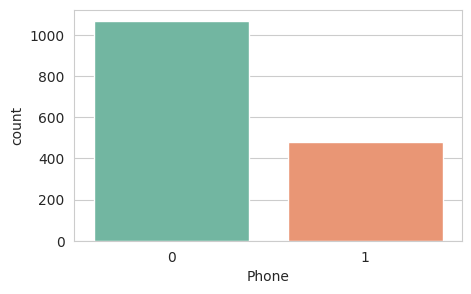

In [204]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(new_cc, x='Phone',palette='Set2')
plt.show()

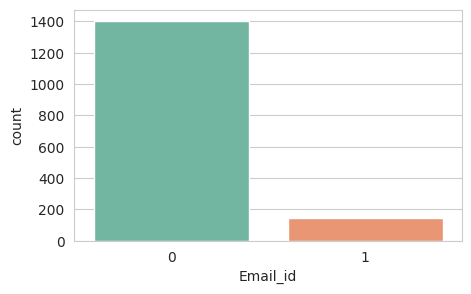

In [205]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(new_cc, x='Email_id',palette='Set2')
plt.show()

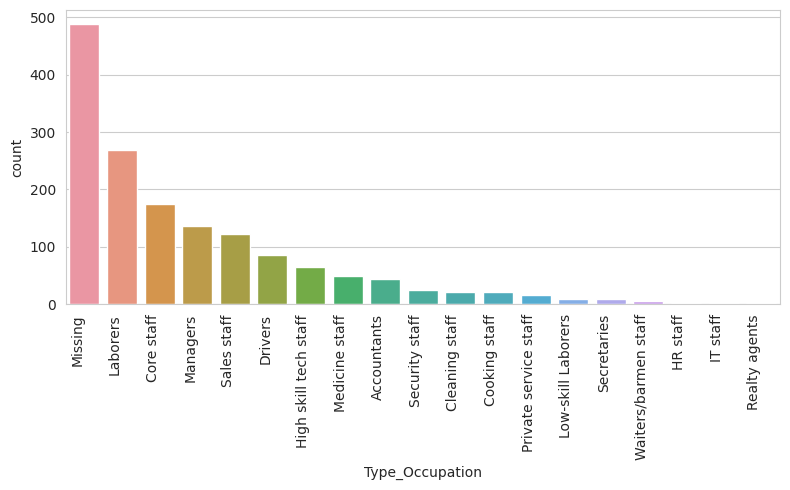

In [206]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
ax = sns.countplot(new_cc, x='Type_Occupation',order = new_cc['Type_Occupation'].value_counts(ascending=False).index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

The **Employed_days column has numerous missing values.** Among the available data, it appears that laborers are the most frequent occupation for credit card applications.

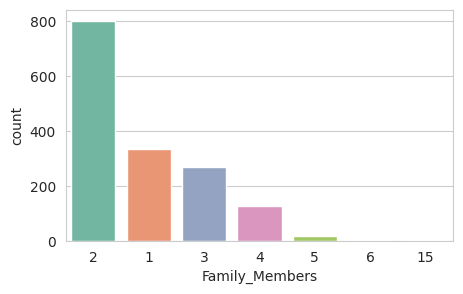

In [207]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(new_cc, x='Family_Members',order = new_cc['Family_Members'].value_counts(ascending=False).index,palette='Set2')
plt.show()

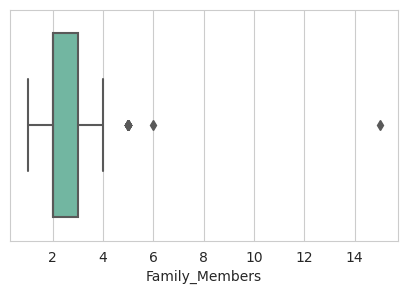

In [208]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.boxplot(new_cc, x='Family_Members',palette='Set2')
plt.show()

**Generating scatter plots to explore relationships between pairs of numerical variables and understand their numerical-to-numerical correlations.**

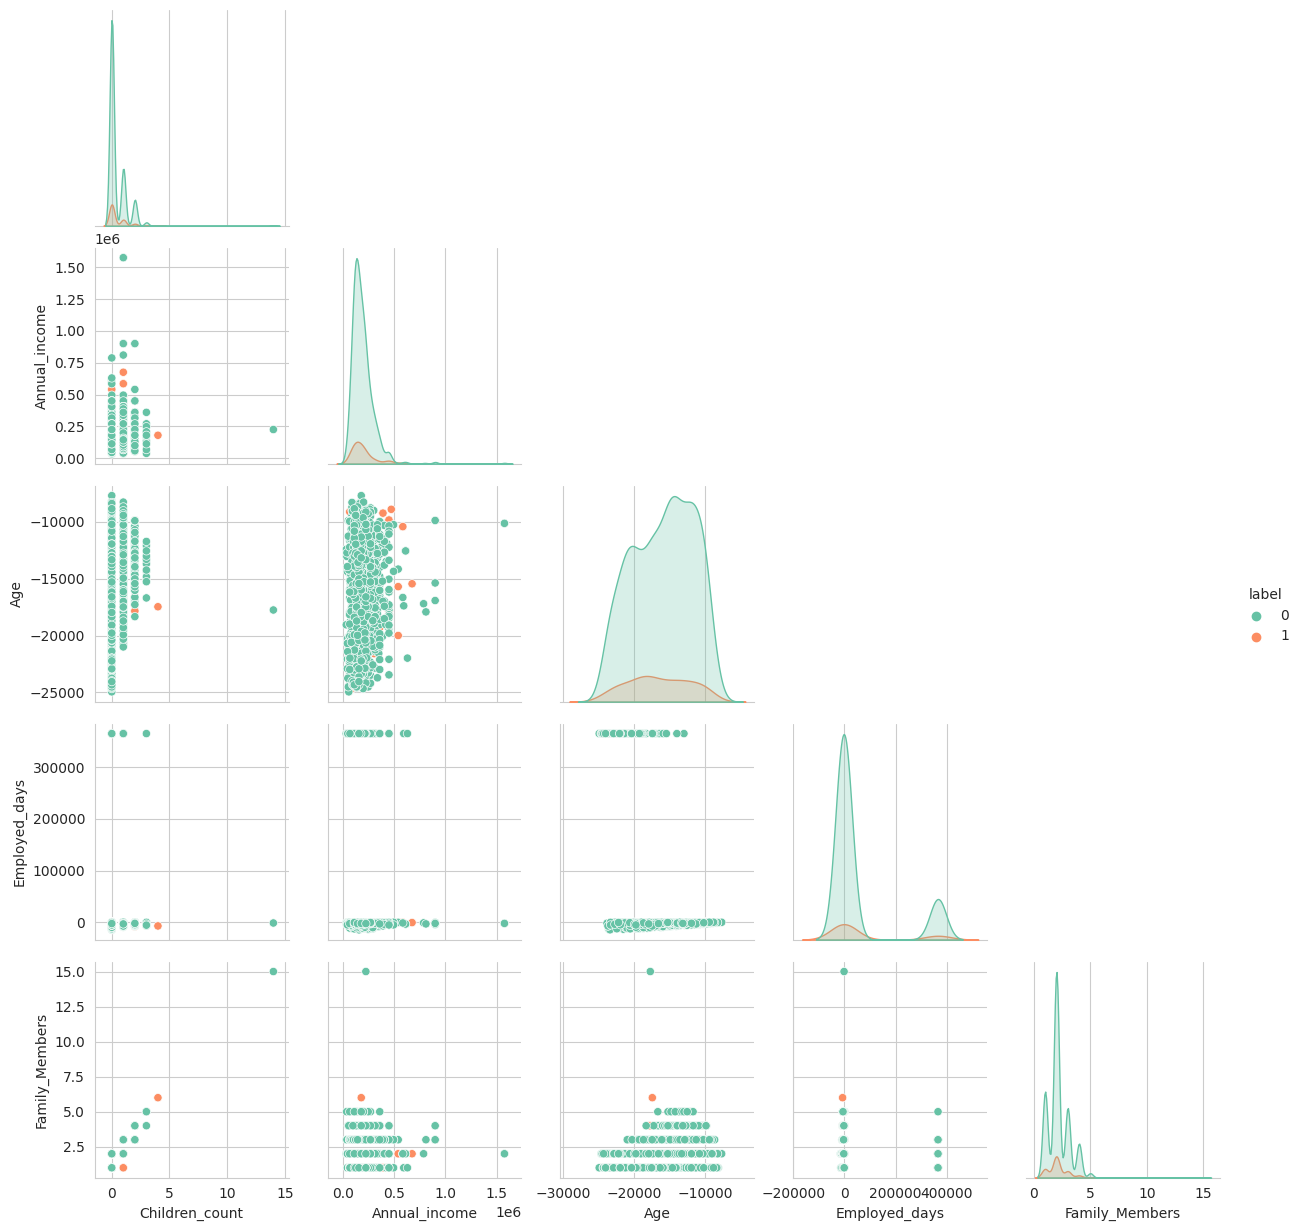

In [209]:
col = new_cc.drop(['ID', 'Gender', 'Car_Owner', 'Property_Owner', 'Type_Income', 'Education_level', 'Marital_status', 'Housing_type', 'Mobile_phone',
                   'Work_Phone', 'Phone', 'Email_id', 'Type_Occupation'], axis=1)

sns.pairplot(col, hue='label', corner=True, palette='Set2')
plt.show()


**There is a noticeable positive correlation between Family_Members and Children_count**. This relationship is logical as having more children typically results in a larger family member count.

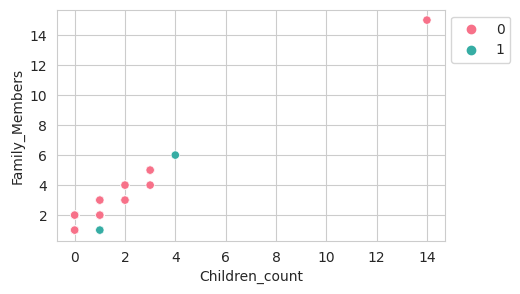

In [210]:
plt.figure(figsize=(5,3))
sns.scatterplot(x = 'Children_count', y='Family_Members', hue='label', data=new_cc, palette = 'husl' )
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [211]:
# Calculating the correlation between columns excluding 'Mobile_phone' and 'label'
col_no_mobile = new_cc.drop(['Mobile_phone', 'label'], axis=1)
correlation = col_no_mobile.corr()
correlation


,ID,Children_count,Annual_income,Age,Employed_days,Work_Phone,Phone,Email_id,Family_Members
ID,1.000000,0.032535,0.030147,0.022909,-0.055396,0.085794,0.008403,-0.037923,0.016950
Children_count,0.032535,1.000000,0.078497,0.279716,-0.219095,0.035014,-0.004908,0.025776,0.890248
Annual_income,0.030147,0.078497,1.000000,0.111638,-0.160175,-0.071171,-0.006439,0.122320,0.050957
Age,0.022909,0.279716,0.111638,1.000000,-0.619039,0.174687,-0.029215,0.166749,0.266527
Employed_days,-0.055396,-0.219095,-0.160175,-0.619039,1.000000,-0.231184,-0.003403,-0.118268,-0.238705
Work_Phone,0.085794,0.035014,-0.071171,0.174687,-0.231184,1.000000,0.352439,-0.009594,0.072228
Phone,0.008403,-0.004908,-0.006439,-0.029215,-0.003403,0.352439,1.000000,0.018105,0.005372
Email_id,-0.037923,0.025776,0.122320,0.166749,-0.118268,-0.009594,0.018105,1.000000,0.035098
Family_Members,0.016950,0.890248,0.050957,0.266527,-0.238705,0.072228,0.005372,0.035098,1.000000


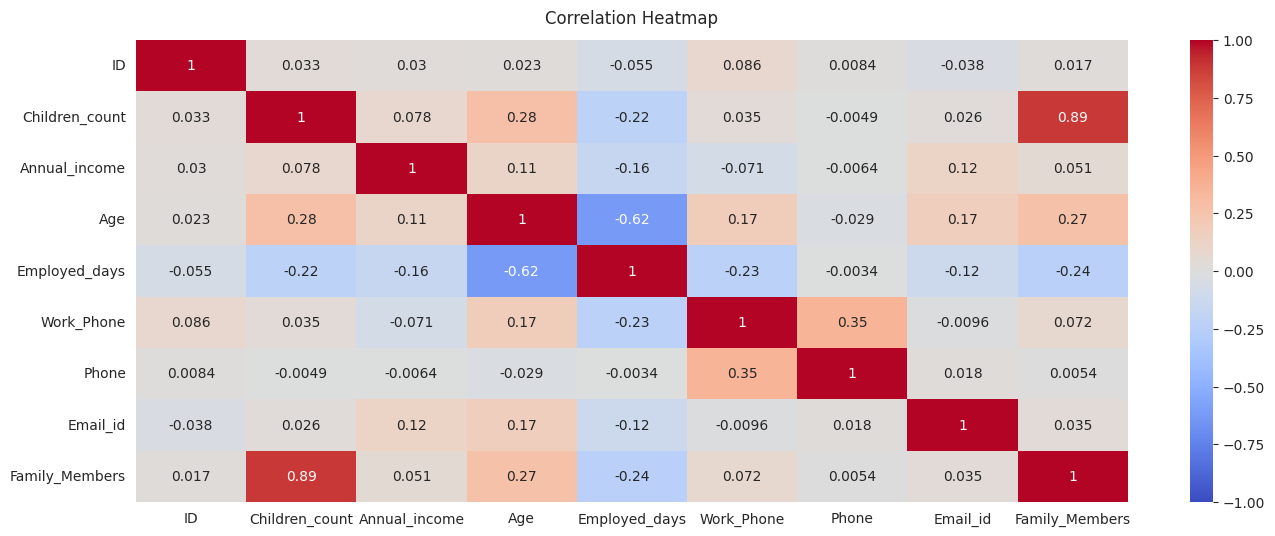

In [212]:
# Calculating the correlation between columns excluding 'Mobile_phone' and 'label' with a heatmap for better visualization
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(col_no_mobile.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
# Title and padding for the heatmap
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)
plt.show()



Family size and children count exhibit a strong positive correlation.
Owning a phone is positively linked with having a work phone.
Age shows positive correlations with family size and children count.
As age increases, having a larger family becomes more probable.
Moreover, age is inversely related to the number of employed days.




#**Producing boxplots to analyze the relationship between numerical and categorical features**

**Comparing the Age variable against the remaining categorical features.**

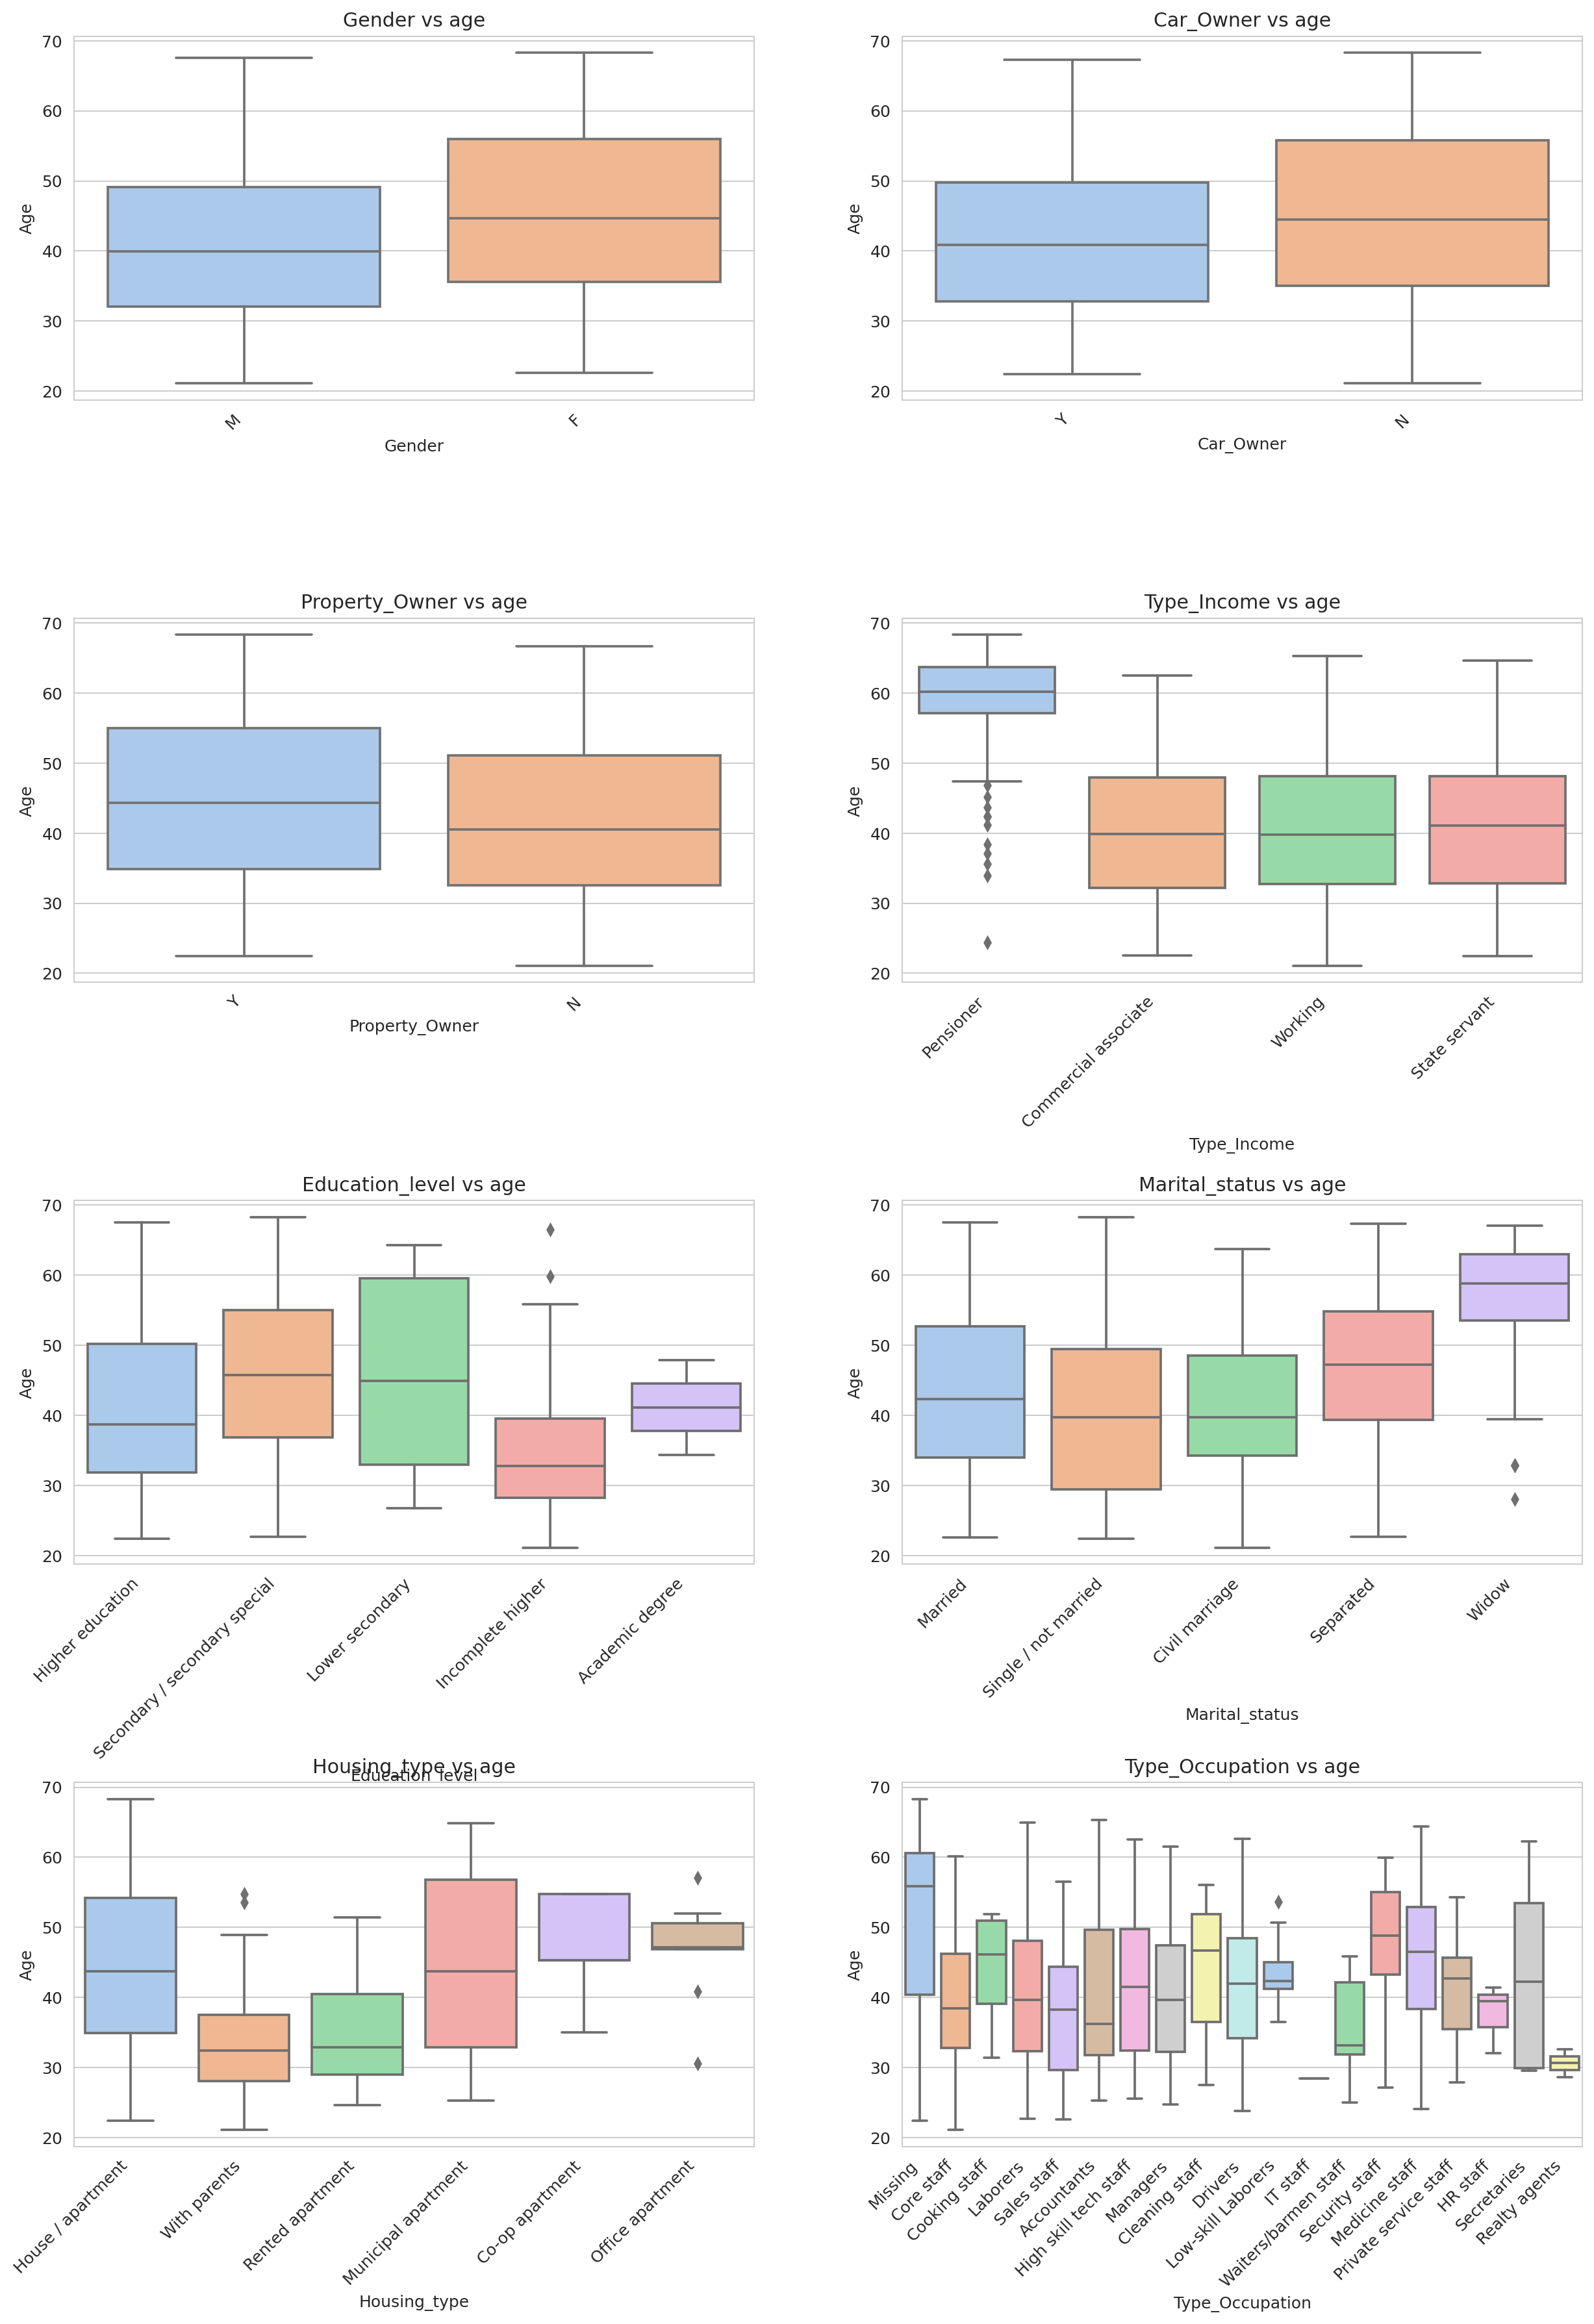

In [213]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20), dpi=180)
fig.tight_layout(pad=6.0)
cat_features = ['Gender', 'Car_Owner', 'Property_Owner', 'Type_Income', 'Education_level', 'Marital_status', 'Housing_type', 'Type_Occupation']

for cat_ft_count, ax in enumerate(axes.flat):
    sns.boxplot(ax=ax, x=new_cc[cat_features[cat_ft_count]], y=np.abs(new_cc['Age']) / 365.25, palette='pastel')
    ax.set_title(cat_features[cat_ft_count] + " vs age")
    plt.sca(ax)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Age')
plt.subplots_adjust(hspace=0.6)
plt.show()




*   Female applicants tend to be older than male applicants.

*   The majority of older individuals don't own a car.

*   Property owners are generally older compared to non-owners.
*   Pensioners are understandably older, although some outliers exist.


*   Individuals with an incomplete higher education tend to be younger, whereas those with a secondary special education tend to be older.
*   Widows tend to be significantly older, although some are in their 30s.


*   Those living with their parents are typically younger, with exceptions.
*  Missing values in the data tend to belong to older individuals, indicating a need for imputation.


*   Security staff members tend to be older, while those in the IT field tend to be younger.













**Analyzing the relationship between Annual Income and other categorical features.**

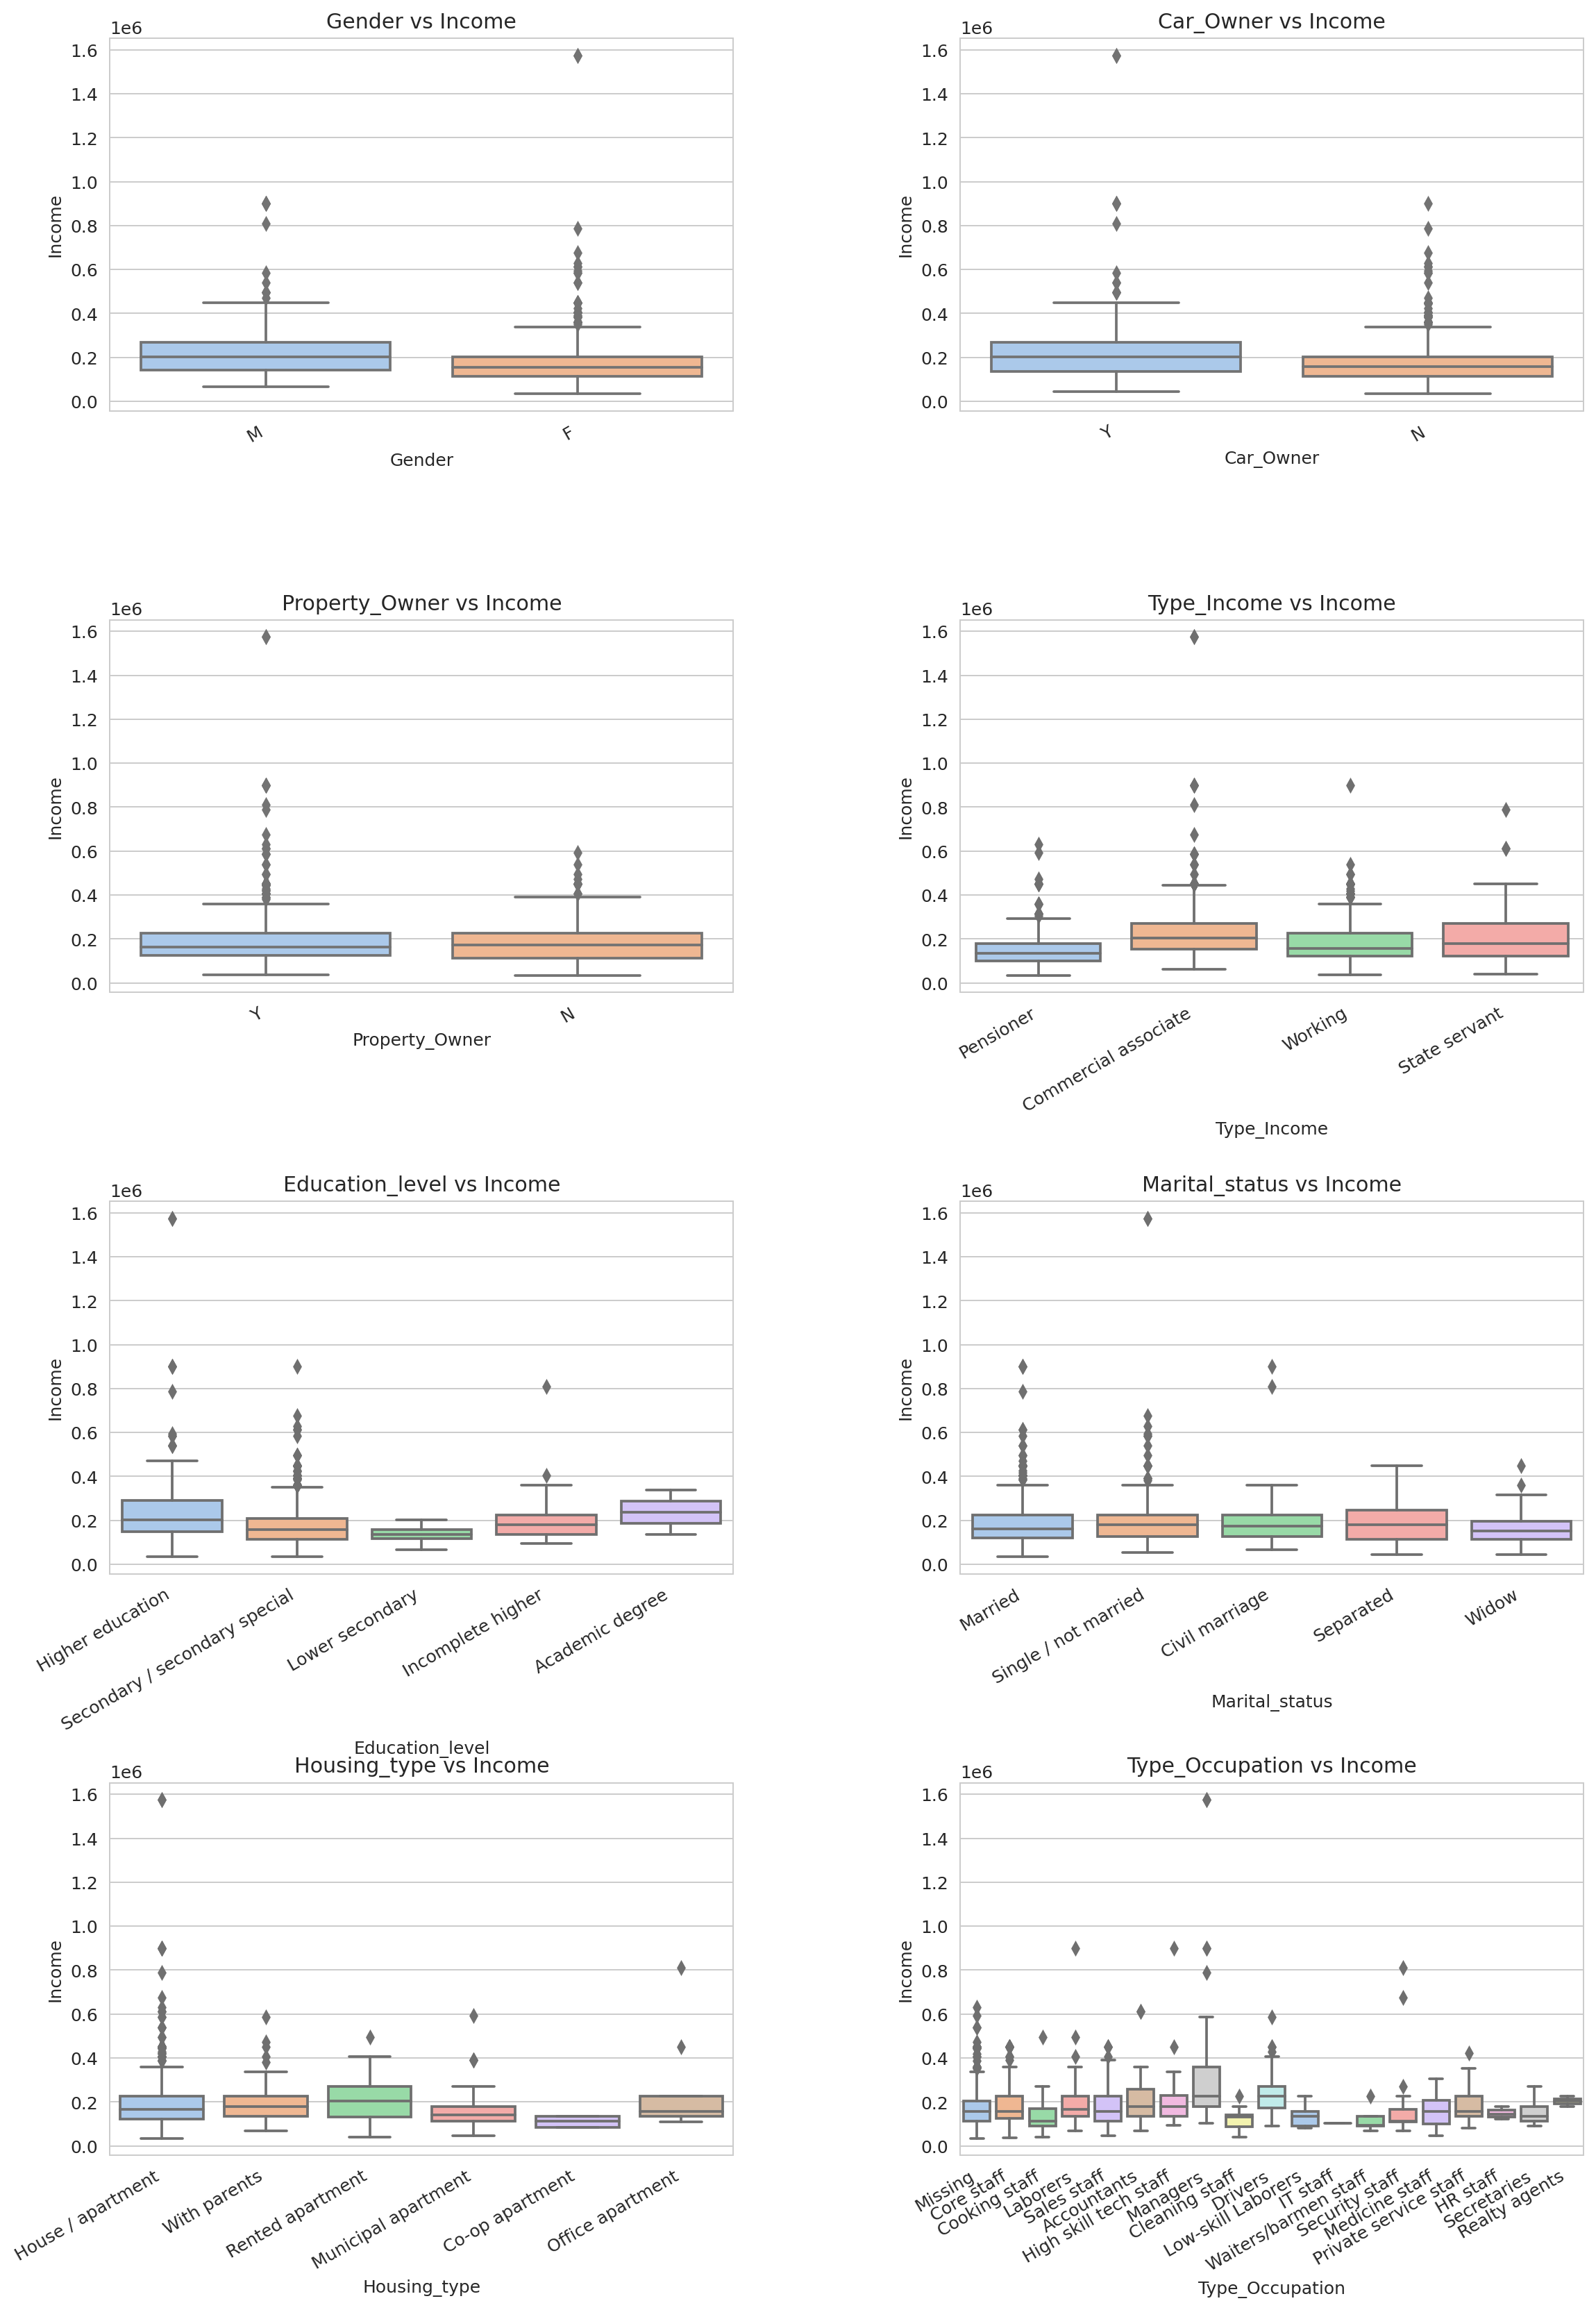

In [214]:
fig, axes = plt.subplots(4,2,figsize=(15,20),dpi=180)
fig.tight_layout(pad=10.0)

for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax=axes[row_count,feat_count],x=new_cc[cat_features[cat_ft_count]],y=np.abs(new_cc['Annual_income']), palette='pastel')
            axes[row_count,feat_count].set_title(cat_features[cat_ft_count] + " vs Income")
            plt.sca(axes[row_count,feat_count])
            plt.xticks(rotation=30,ha='right')
            plt.ylabel('Income')
            cat_ft_count += 1
    break


*  Males generally tend to have higher incomes.

*   Individuals who own a car tend to have higher incomes.

*   Commercial individuals often have higher incomes.
*   Those who completed an academic degree tend to earn more.


*  People with higher earnings are more inclined to live in rented apartments, possibly due to job locations away from their own homes.
*  Individuals with managerial designations typically earn higher incomes.


**Exploring Associations Between Categorical Features and the Target Variable**

**Null Hypothesis (H0):** The categorical features are independent of the target variable.

**Alternative Hypothesis (H1):** There exists a significant association between one or more categorical features and the target variable.

In [215]:
# Importing statistical functions from the scipy library
from scipy import stats

In [216]:
def chi_func(feature):
    # Selecting rows with rejected label
    rejected_ft = new_cc[new_cc['label'] == 1][feature]
    rejected_ft_ct = pd.crosstab(index=rejected_ft, columns=['Count']).rename_axis(None, axis=1)

    # Drop the index feature name
    rejected_ft_ct.index.name = None

    # Calculating observed values
    obs = rejected_ft_ct
    print('Observed values:\n')
    print(obs)
    print('\n')

    # Expected values
    print(obs.index)
    exp = pd.DataFrame([obs['Count'].sum() / len(obs)] * len(obs.index), columns=['Count'], index=obs.index)
    print('Expected values:\n')
    print(exp)
    print('\n')

    # Chi-square test
    chi_squared_stat = (((obs - exp) ** 2) / exp).sum()
    print('Chi-square:\n')
    print(chi_squared_stat[0])
    print('\n')

    # Calculating p-value
    p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=len(obs) - 1)
    print('P-value:\n')
    print(p_value)
    print('\n')

    # Evaluating the test result based on significance level (0.05)
    if p_value <= 0.05:
        print('Reject H0: Feature categories have a significant effect on the target variable.')
    else:
        print('Retain H0: Feature categories have no effect on the target variable.')


In [217]:
# Looping through categorical features and performing chi-square tests
for ft in cat_features:
    print('\n\n**** {} ****\n'.format(ft))  # Print the feature name for analysis
    chi_func(ft)  # Perform chi-square test for the current categorical feature




**** Gender ****

Observed values:

   Count
F    100
M     75


Index(['F', 'M'], dtype='object')
Expected values:

   Count
F   87.5
M   87.5


Chi-square:

3.5714285714285716


P-value:

[0.05878172]


Retain H0: Feature categories have no effect on the target variable.


**** Car_Owner ****

Observed values:

   Count
N    108
Y     67


Index(['N', 'Y'], dtype='object')
Expected values:

   Count
N   87.5
Y   87.5


Chi-square:

9.605714285714285


P-value:

[0.00193973]


Reject H0: Feature categories have a significant effect on the target variable.


**** Property_Owner ****

Observed values:

   Count
N     65
Y    110


Index(['N', 'Y'], dtype='object')
Expected values:

   Count
N   87.5
Y   87.5


Chi-square:

11.571428571428571


P-value:

[0.00066973]


Reject H0: Feature categories have a significant effect on the target variable.


**** Type_Income ****

Observed values:

                      Count
Commercial associate     50
Pensioner                42
State servant

##**Insights from Business Exploratory Data Analysis (EDA)**

The dataset reveals that the predominant applicants are** females, averaging around 44 years old.** They tend to be married with no children, having completed secondary education. **On average, they have about 7 years of work experience, earning an annual income of approximately 191,400.** Interestingly, **they do not own a car but possess property ownershi**p and reside in rented apartments.

**Conversely, the pensioners within this group are typically older individuals who are widowed.**

Notably, gender does not appear to significantly impact the target variable.

An important observation is that **rejected applicants tend to have shorter employment durations,** constituting approximately 11% of the total applicant pool.

**Data Cleaning**

Transformation via Encoding of Categorical Variables:

In [218]:
# Splitting the Dataset to Prevent Data Leakage
# Extracting Independent and Dependent Variables

X = new_cc.iloc[:, :-1]  # Independent Variables
y =new_cc.iloc[:, -1]   # Dependent Variable


In [219]:
X['Education_level'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

In [220]:
# Ordinal Encoding for Education Level
from sklearn.preprocessing import OrdinalEncoder

EL_dict = {
    'Lower secondary': 1,
    'Secondary / secondary special': 2,
    'Incomplete higher': 3,
    'Higher education': 4,
    'Academic degree': 5
}

# Mapping Education Level to Ordinal Values
X['Education_level'] = X['Education_level'].map(EL_dict)


In [221]:
# Label Encoding for Remaining Categorical Variables
from sklearn.preprocessing import LabelEncoder

catcl_cols = ['Gender', 'Car_Owner', 'Property_Owner', 'Type_Income', 'Marital_status', 'Housing_type', 'Type_Occupation']

for col in catcl_cols:
    X[col] = LabelEncoder().fit_transform(X[col])


##**Handling Missing Values**

To address missing data, I'm implementing the KNN imputation technique.

In [222]:
pip install fancyimpute


In [223]:
from fancyimpute import KNN

# Initializing KNN imputer
knn_imputer = KNN()

# Creating a deep copy of the dataset
X_knn = X.copy(deep=True)

# Imputing missing values using KNN imputer
X_knn.iloc[:, :] = knn_imputer.fit_transform(X_knn)


Imputing row 1/1548 with 0 missing, elapsed time: 0.427
Imputing row 101/1548 with 0 missing, elapsed time: 0.429
Imputing row 201/1548 with 0 missing, elapsed time: 0.430
Imputing row 301/1548 with 0 missing, elapsed time: 0.431
Imputing row 401/1548 with 0 missing, elapsed time: 0.432
Imputing row 501/1548 with 0 missing, elapsed time: 0.433
Imputing row 601/1548 with 0 missing, elapsed time: 0.434
Imputing row 701/1548 with 0 missing, elapsed time: 0.434
Imputing row 801/1548 with 0 missing, elapsed time: 0.435
Imputing row 901/1548 with 0 missing, elapsed time: 0.436
Imputing row 1001/1548 with 0 missing, elapsed time: 0.438
Imputing row 1101/1548 with 0 missing, elapsed time: 0.438
Imputing row 1201/1548 with 0 missing, elapsed time: 0.439
Imputing row 1301/1548 with 0 missing, elapsed time: 0.441
Imputing row 1401/1548 with 0 missing, elapsed time: 0.441
Imputing row 1501/1548 with 0 missing, elapsed time: 0.443


In [224]:
X_knn.head()

,ID,Gender,Car_Owner,Property_Owner,Children_count,Annual_income,Type_Income,Education_level,Marital_status,Housing_type,Age,Employed_days,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members
0,5008827.0,1.0,1.0,1.0,0.0,180000.000000,1.0,4.0,1.0,1.0,-18772.000000,365243.0,1.0,0.0,0.0,0.0,12.0,2.0
1,5009744.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12.0,2.0
2,5009746.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,-13556.999716,-586.0,1.0,1.0,1.0,0.0,12.0,2.0
3,5009749.0,0.0,1.0,0.0,0.0,315000.024923,0.0,4.0,1.0,1.0,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12.0,2.0
4,5009752.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12.0,2.0


In [225]:
X_knn.isnull().sum()    # Checking missing values

ID                 0
Gender             0
Car_Owner          0
Property_Owner     0
Children_count     0
Annual_income      0
Type_Income        0
Education_level    0
Marital_status     0
Housing_type       0
Age                0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
Email_id           0
Type_Occupation    0
Family_Members     0
dtype: int64

In [226]:
new_cc = pd.concat([X_knn,y], axis=1)
new_cc.head(10)

,ID,Gender,Car_Owner,Property_Owner,Children_count,Annual_income,Type_Income,Education_level,Marital_status,Housing_type,Age,Employed_days,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827.0,1.0,1.0,1.0,0.0,180000.000000,1.0,4.0,1.0,1.0,-18772.000000,365243.0,1.0,0.0,0.0,0.0,12.0,2.0,1
1,5009744.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
2,5009746.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,-13556.999716,-586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
3,5009749.0,0.0,1.0,0.0,0.0,315000.024923,0.0,4.0,1.0,1.0,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
4,5009752.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
5,5009753.0,0.0,1.0,0.0,0.0,315000.000000,1.0,4.0,1.0,1.0,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
6,5009754.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
7,5009894.0,0.0,0.0,0.0,0.0,180000.000000,1.0,2.0,1.0,1.0,-22134.000000,365243.0,1.0,0.0,0.0,0.0,12.0,2.0,1
8,5010864.0,1.0,1.0,1.0,1.0,450000.000000,0.0,2.0,1.0,1.0,-18173.000000,-678.0,1.0,0.0,1.0,1.0,3.0,3.0,1
9,5010868.0,1.0,1.0,1.0,1.0,450000.000000,1.0,2.0,1.0,1.0,-18173.000000,-678.0,1.0,0.0,1.0,1.0,3.0,3.0,1


In [227]:
# selecting rows with employment length is 365243 which corresponds to retirees and change 365243 to 0
new_cc.loc[new_cc['Employed_days'] == 365243, 'Employed_days'] = 0

In [228]:
# Converting days into absolute value
new_cc[['Employed_days','Age']] = np.abs(new_cc[['Employed_days','Age']])
new_cc.head(10)

,ID,Gender,Car_Owner,Property_Owner,Children_count,Annual_income,Type_Income,Education_level,Marital_status,Housing_type,Age,Employed_days,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827.0,1.0,1.0,1.0,0.0,180000.000000,1.0,4.0,1.0,1.0,18772.000000,0.0,1.0,0.0,0.0,0.0,12.0,2.0,1
1,5009744.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,13557.000000,586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
2,5009746.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,13556.999716,586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
3,5009749.0,0.0,1.0,0.0,0.0,315000.024923,0.0,4.0,1.0,1.0,13557.000000,586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
4,5009752.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,13557.000000,586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
5,5009753.0,0.0,1.0,0.0,0.0,315000.000000,1.0,4.0,1.0,1.0,13557.000000,586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
6,5009754.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,13557.000000,586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
7,5009894.0,0.0,0.0,0.0,0.0,180000.000000,1.0,2.0,1.0,1.0,22134.000000,0.0,1.0,0.0,0.0,0.0,12.0,2.0,1
8,5010864.0,1.0,1.0,1.0,1.0,450000.000000,0.0,2.0,1.0,1.0,18173.000000,678.0,1.0,0.0,1.0,1.0,3.0,3.0,1
9,5010868.0,1.0,1.0,1.0,1.0,450000.000000,1.0,2.0,1.0,1.0,18173.000000,678.0,1.0,0.0,1.0,1.0,3.0,3.0,1


**Addressing Outliers**

Following the Exploratory Data Analysis (EDA), identified outliers in certain features require resolution. To manage these outliers, I'm utilizing the IQR (Interquartile Range) method and replacing those values with capped limits.

In [229]:
out_feature = ['Annual_income','Employed_days','Family_Members']
for i in out_feature:
    Q1 = new_cc[i].quantile(0.25)
    Q3 = new_cc[i].quantile(0.75)
    IQR = Q3-Q1
    upper_limit = Q3 + 1.5*IQR
    lower_limit = Q1 - 1.5*IQR

    new_cc[i] = np.where(
    new_cc[i] > upper_limit,
    upper_limit,
    np.where(
        new_cc[i] < lower_limit,
        lower_limit,
        new_cc[i]
    )
)

<Axes: xlabel='Family_Members'>

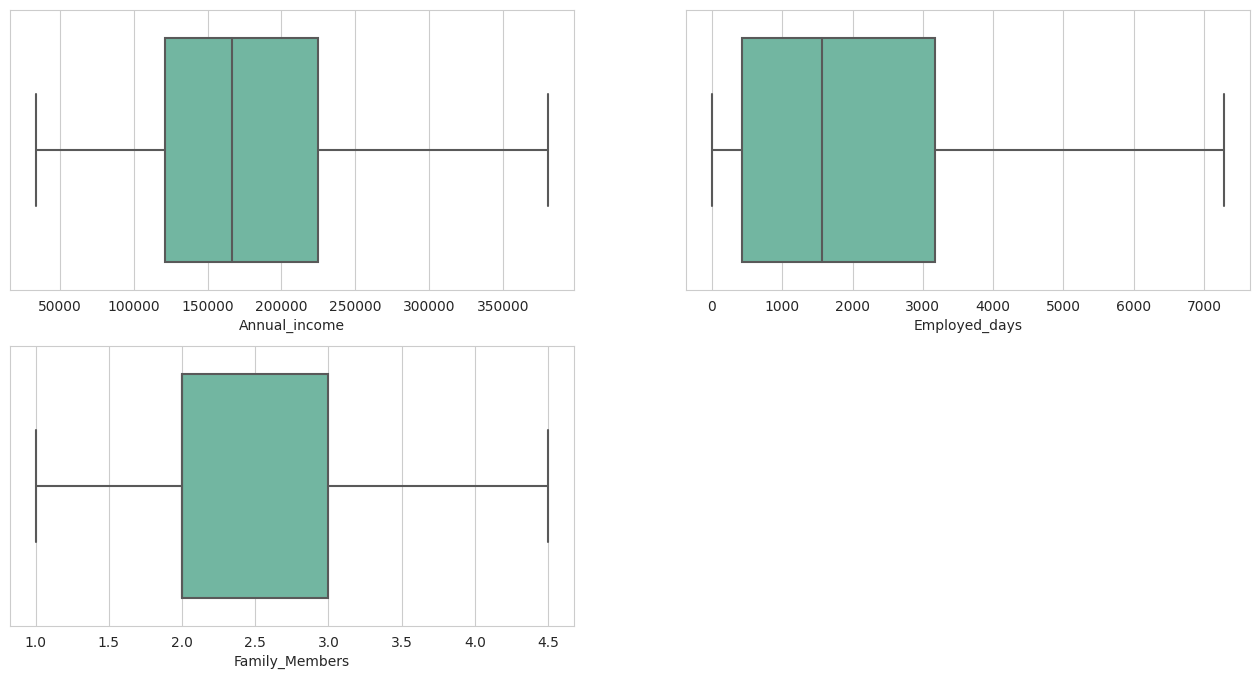

In [230]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(x= new_cc['Annual_income'],palette='Set2')

plt.subplot(2,2,2)
sns.boxplot(x= new_cc['Employed_days'],palette='Set2')

plt.subplot(2,2,3)
sns.boxplot(x= new_cc['Family_Members'],palette='Set2')

**Feature Selection**

**ID**: Initially useful for dataset merging, but no longer contributes to predictions, hence it's removed.

**Mobile_phone:** This feature lacks variability as everyone possesses a mobile phone, offering no informative value.

**Children count:** Due to high correlation with Family member count, it's dropped to mitigate multicollinearity.

**Type_Occupation:** Given numerous missing values and no substantial distribution across categories, it's dropped from consideration.

In [231]:
new_cc = new_cc.drop(['ID','Children_count','Mobile_phone','Type_Occupation'], axis = 1)  # Dropping columns


In [232]:
new_cc.head()

,Gender,Car_Owner,Property_Owner,Annual_income,Type_Income,Education_level,Marital_status,Housing_type,Age,Employed_days,Work_Phone,Phone,Email_id,Family_Members,label
0,1.0,1.0,1.0,180000.000000,1.0,4.0,1.0,1.0,18772.000000,0.0,0.0,0.0,0.0,2.0,1
1,0.0,1.0,0.0,315000.000000,0.0,4.0,1.0,1.0,13557.000000,586.0,1.0,1.0,0.0,2.0,1
2,0.0,1.0,0.0,315000.000000,0.0,4.0,1.0,1.0,13556.999716,586.0,1.0,1.0,0.0,2.0,1
3,0.0,1.0,0.0,315000.024923,0.0,4.0,1.0,1.0,13557.000000,586.0,1.0,1.0,0.0,2.0,1
4,0.0,1.0,0.0,315000.000000,0.0,4.0,1.0,1.0,13557.000000,586.0,1.0,1.0,0.0,2.0,1


In [233]:
# Splitting Independent and dependent Variable.
X = new_cc.iloc[:,:-1]
y = new_cc.iloc[:,-1]

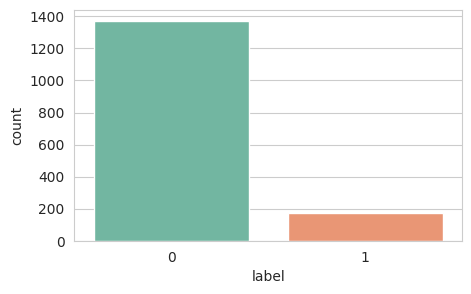

In [234]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(new_cc, x='label',palette='Set2')
plt.show()

We are oversampling with SMOTE because the minority class (Label = 1) is very rare in the data.



In [235]:
from collections import Counter


In [236]:
from imblearn.over_sampling import SMOTE
SMOTE  = SMOTE()
print('Original Dataset shape %s'% Counter(y))
X_res , y_res = SMOTE.fit_resample(X,y)
print('After oversample Dataset shape %s'% Counter(y_res))

Original Dataset shape Counter({0: 1373, 1: 175})
After oversample Dataset shape Counter({1: 1373, 0: 1373})


In [237]:
CC = pd.concat([X_knn,y], axis=1)
CC.head(10)

,ID,Gender,Car_Owner,Property_Owner,Children_count,Annual_income,Type_Income,Education_level,Marital_status,Housing_type,Age,Employed_days,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827.0,1.0,1.0,1.0,0.0,180000.000000,1.0,4.0,1.0,1.0,-18772.000000,365243.0,1.0,0.0,0.0,0.0,12.0,2.0,1
1,5009744.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
2,5009746.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,-13556.999716,-586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
3,5009749.0,0.0,1.0,0.0,0.0,315000.024923,0.0,4.0,1.0,1.0,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
4,5009752.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
5,5009753.0,0.0,1.0,0.0,0.0,315000.000000,1.0,4.0,1.0,1.0,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
6,5009754.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
7,5009894.0,0.0,0.0,0.0,0.0,180000.000000,1.0,2.0,1.0,1.0,-22134.000000,365243.0,1.0,0.0,0.0,0.0,12.0,2.0,1
8,5010864.0,1.0,1.0,1.0,1.0,450000.000000,0.0,2.0,1.0,1.0,-18173.000000,-678.0,1.0,0.0,1.0,1.0,3.0,3.0,1
9,5010868.0,1.0,1.0,1.0,1.0,450000.000000,1.0,2.0,1.0,1.0,-18173.000000,-678.0,1.0,0.0,1.0,1.0,3.0,3.0,1


In [238]:
df = pd.concat([pd.DataFrame(X_res),pd.DataFrame(y_res)],axis=1)
df

,Gender,Car_Owner,Property_Owner,Annual_income,Type_Income,Education_level,Marital_status,Housing_type,Age,Employed_days,Work_Phone,Phone,Email_id,Family_Members,label
0,1.000000,1.000000,1.000000,180000.000000,1.000000,4.000000,1.000000,1.000000,18772.000000,0.000000,0.000000,0.000000,0.0,2.000000,1
1,0.000000,1.000000,0.000000,315000.000000,0.000000,4.000000,1.000000,1.000000,13557.000000,586.000000,1.000000,1.000000,0.0,2.000000,1
2,0.000000,1.000000,0.000000,315000.000000,0.000000,4.000000,1.000000,1.000000,13556.999716,586.000000,1.000000,1.000000,0.0,2.000000,1
3,0.000000,1.000000,0.000000,315000.024923,0.000000,4.000000,1.000000,1.000000,13557.000000,586.000000,1.000000,1.000000,0.0,2.000000,1
4,0.000000,1.000000,0.000000,315000.000000,0.000000,4.000000,1.000000,1.000000,13557.000000,586.000000,1.000000,1.000000,0.0,2.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,0.000000,0.000000,0.605365,100775.858537,1.000000,3.210730,1.605365,1.000000,23624.411924,0.000000,0.000000,0.000000,0.0,1.394635,1
2742,0.000000,0.966948,1.000000,202500.000000,3.000000,3.933896,1.000000,1.000000,15138.945937,3955.689245,0.000000,0.000000,0.0,2.000000,1
2743,0.000000,0.000000,0.813799,67500.000000,0.000000,4.000000,2.000000,1.000000,18952.000000,499.000000,0.000000,1.000000,0.0,1.000000,1
2744,0.140171,0.140171,1.000000,112500.000000,0.420514,2.000000,1.000000,1.000000,12705.357701,925.000000,0.140171,0.140171,0.0,3.859829,1


In [239]:
# Splitting Independent and dependent Variable.
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [240]:
y.value_counts()

1    1373
0    1373
Name: label, dtype: int64

**Feature Scaling**

Splitting the dataset into the Training set and Test set

In [241]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and test sets
# test_size 0.2 means 20 percent of data will be in the test set
# random_State = 1 ensures consistent splitting for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [242]:
# Checking the shape of Train and Test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2196, 14), (550, 14), (2196,), (550,))

In [243]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# fit will calculate mean and sd
# transform will calculate standardized value
X_train[['Annual_income','Age','Employed_days']] = ss.fit_transform(X_train[['Annual_income','Age','Employed_days']])

# Here we will use only transform method as test data set is like new dataset.
# Hence, we have to use same scalar that was used for training datset because ML model will be trained with particular scaler
# using fit method will add new scalar
X_test[['Annual_income','Age','Employed_days']] = ss.transform(X_test[['Annual_income','Age','Employed_days']])

**Model Training**

As per the Target varible it is classification problem.
I am going to use classifier algorithm to determine best model.

**Logistic Regression**


In [244]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
# Importing required libraries
from sklearn.linear_model import LogisticRegression

# Creating a Logistic regression object
log=LogisticRegression()

# Passing independant and dependant training data to the model
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)

# Confusion Matrix
cm_log=confusion_matrix(y_test, y_pred_log)
print(cm_log)
print()
print("*" *30)
print()

acc_log_train = accuracy_score(y_train,log.predict(X_train))
acc_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

# Print the evaluation metrics
print("Accuracy of Train:", acc_log_train)
print("Accuracy of Test:", acc_log)
print("Precision:", precision_log)
print("Recall:", recall_log)
print("F1 Score:", f1_log)

[[155 122]
 [107 166]]

******************************

Accuracy of Train: 0.6256830601092896
Accuracy of Test: 0.5836363636363636
Precision: 0.5763888888888888
Recall: 0.608058608058608
F1 Score: 0.5918003565062387


**Decision Tree**

In [245]:
# Importing required library
from sklearn.tree import DecisionTreeClassifier

# Creating a Logistic regression object
decision_tree = DecisionTreeClassifier()

# Passing independant and dependant training data to the model
decision_tree.fit(X_train,y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Confusion Matrix
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
print(cm_decision_tree)
print()
print("*" *30)
print()

acc_decision_tree_train = accuracy_score(y_train,decision_tree.predict(X_train))
acc_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
f1_decision_tree = f1_score(y_test, y_pred_decision_tree)

# Print the evaluation metrics
print("Accuracy of Train:", acc_decision_tree_train)
print("Accuracy of Test:", acc_decision_tree)
print("Precision:", precision_decision_tree)
print("Recall:", recall_decision_tree)
print("F1 Score:", f1_decision_tree)

[[244  33]
 [ 21 252]]

******************************

Accuracy of Train: 0.9968123861566485
Accuracy of Test: 0.9018181818181819
Precision: 0.8842105263157894
Recall: 0.9230769230769231
F1 Score: 0.9032258064516129


**Random forest**


In [246]:
# Importing required library
from sklearn.ensemble import RandomForestClassifier

# Creating a Logistic regression object
random_forest = RandomForestClassifier(n_estimators= 10, criterion="gini")

# Passing independant and dependant training data to the model
random_forest.fit(X_train,y_train)
y_pred_random_forest = random_forest.predict(X_test)

# Confusion Matrix
cm_random_forest=confusion_matrix(y_test, y_pred_random_forest)
print(cm_random_forest)
print()
print("*" *30)
print()

acc_random_forest_train = accuracy_score(y_train,random_forest.predict(X_train))
acc_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest)

# Print the evaluation metrics
print("Accuracy of Train:", acc_random_forest_train)
print("Accuracy of Test:", acc_random_forest)
print("Precision:", precision_random_forest)
print("Recall:", recall_random_forest)
print("F1 Score:", f1_random_forest)

[[271   6]
 [ 18 255]]

******************************

Accuracy of Train: 0.99408014571949
Accuracy of Test: 0.9563636363636364
Precision: 0.9770114942528736
Recall: 0.9340659340659341
F1 Score: 0.9550561797752809


**XGBoost**


In [247]:
# Importing required library
import xgboost as xgb

# Creating a Logistic regression object
xgb_classifier = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=41)

# Passing independant and dependant training data to the model
xgb_classifier.fit(X_train,y_train)
y_pred_xgb_classifier = xgb_classifier.predict(X_test)

# Confusion Matrix
cm_xgb_classifier = confusion_matrix(y_test, y_pred_xgb_classifier)
print(cm_xgb_classifier)
print()
print("*" *30)
print()

acc_xgb_classifier_train = accuracy_score(y_train,xgb_classifier.predict(X_train))
acc_xgb_classifier = accuracy_score(y_test, y_pred_xgb_classifier)
precision_xgb_classifier = precision_score(y_test, y_pred_xgb_classifier)
recall_xgb_classifier = recall_score(y_test, y_pred_xgb_classifier)
f1_xgb_classifier = f1_score(y_test, y_pred_xgb_classifier)

# Print the evaluation metrics
print("Accuracy of Train:", acc_xgb_classifier_train)
print("Accuracy of Test:", acc_xgb_classifier)
print("Precision:", precision_xgb_classifier)
print("Recall:", recall_xgb_classifier)
print("F1 Score:", f1_xgb_classifier)

[[267  10]
 [ 37 236]]

******************************

Accuracy of Train: 0.9262295081967213
Accuracy of Test: 0.9145454545454546
Precision: 0.959349593495935
Recall: 0.8644688644688645
F1 Score: 0.9094412331406552


Support Vector Classifier (SVC)


In [248]:
# Importing required libraries
from sklearn.svm import SVC

# Creating a svc object
svc = SVC(kernel='linear')

# Passing independant and dependant training data to the model
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

# Confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
print(cm_svc)
print()
print("*" *30)
print()

acc_svc_train = accuracy_score(y_train,svc.predict(X_train))
acc_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

# Print the evaluation metrics
print("Accuracy of Train:", acc_svc_train)
print("Accuracy of Test:", acc_svc)
print("Precision:", precision_svc)
print("Recall:", recall_svc)
print("F1 Score:", f1_svc)


[[145 132]
 [ 98 175]]

******************************

Accuracy of Train: 0.6256830601092896
Accuracy of Test: 0.5818181818181818
Precision: 0.5700325732899023
Recall: 0.6410256410256411
F1 Score: 0.603448275862069


In [249]:
#applying gridsearchcv for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# defining parameter range

param_grid_svc = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

svc_grid = SVC()
grid_svc = GridSearchCV(estimator= svc_grid, param_grid = param_grid_svc , verbose = True, cv = 10)

# fitting the model for grid search
grid_svc.fit(X_train, y_train)

# print best parameter after tuning
print(grid_svc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_svc.best_estimator_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [250]:
# Creating a svc object
svc1 = SVC(C= 10, kernel='rbf',gamma = 1 )

# Passing independant and dependant training data to the model
svc1.fit(X_train,y_train)
y_pred_svc1 = svc1.predict(X_test)

# Confusion Matrix
cm_svc1 = confusion_matrix(y_test, y_pred_svc1)
print(cm_svc1)
print()
print("*" *30)
print()

acc_svc1_train = accuracy_score(y_train,svc1.predict(X_train))
acc_svc1 = accuracy_score(y_test, y_pred_svc1)
precision_svc1 = precision_score(y_test, y_pred_svc1)
recall_svc1 = recall_score(y_test, y_pred_svc1)
f1_svc1 = f1_score(y_test, y_pred_svc1)

# Print the evaluation metrics
print("Accuracy of Train:", acc_svc1_train)
print("Accuracy of Test:", acc_svc1)
print("Precision:", precision_svc1)
print("Recall:", recall_svc1)
print("F1 Score:", f1_svc1)

[[266  11]
 [ 13 260]]

******************************

Accuracy of Train: 0.9927140255009107
Accuracy of Test: 0.9563636363636364
Precision: 0.959409594095941
Recall: 0.9523809523809523
F1 Score: 0.9558823529411764


**KNN**


In [251]:
# Importing required libraries
from sklearn.neighbors import KNeighborsClassifier

# Creating a svc object
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Passing independant and dependant training data to the model
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)
print()
print("*" *30)
print()

acc_knn_train = accuracy_score(y_train,knn.predict(X_train))
acc_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print the evaluation metrics
print("Accuracy of Train:", acc_knn_train)
print("Accuracy of Test:", acc_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

[[205  72]
 [ 10 263]]

******************************

Accuracy of Train: 0.9134790528233151
Accuracy of Test: 0.850909090909091
Precision: 0.7850746268656716
Recall: 0.9633699633699634
F1 Score: 0.8651315789473684


**Model Evaluation**


In [252]:
models  = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree', 'Random Forest','XGBoost','SVC','KNN'],
    'Score_Train': [acc_log_train, acc_decision_tree_train, acc_random_forest_train,acc_xgb_classifier_train,acc_svc1_train,acc_knn_train],
    'Score_Test' :[acc_log, acc_decision_tree, acc_random_forest,acc_xgb_classifier,acc_svc1,acc_knn]

})

models

,Model,Score_Train,Score_Test
0,Logistic Regression,0.625683,0.583636
1,Decision Tree,0.996812,0.901818
2,Random Forest,0.994080,0.956364
3,XGBoost,0.926230,0.914545
4,SVC,0.992714,0.956364
5,KNN,0.913479,0.850909


##**Conclusion**


---


The analysis of the Classification reports from each model suggests that Random Forest stands out as the superior model for predicting credit card approvals. Several factors contribute to its superiority:

Handling Complex Relationships: Random Forest demonstrates adeptness in managing both linear and non-linear relationships within the data, resulting in enhanced accuracy.

Reducing Overfitting and Enhancing Generalization: The technique effectively mitigates overfitting, promoting better generalization crucial for real-world applications.

Optimization Algorithms: Random Forest employs optimized algorithms, ensuring computational efficiency, which makes it suitable for large datasets. Additionally, its feature importance analysis provides valuable insights for decision-making.

Ensemble Approach: Utilizing an ensemble approach, Random Forest amalgamates weak learners into a robust predictor, thereby amplifying overall performance.